# Mini project: Solar Panel

The goal of this project is to plot the the location of the sun based on the date, time, and location.

**Steps of the cod:**
* In the first part the user is ask to provide the code with date and time, in a specific format. Then he/she has to give the user the interested location (City, Country). The code then returns the sunrise, sunset, and etc.
* In the second part the position of the sun is plotted in the sky, in a normalised format, using a red circle; with sunruse and sunset being at altitude zero and the nuun at altitude one. the color of the sky will also be yello at when the time is close to the noon.

In [4]:
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
%matplotlib notebook
from datetime import datetime
from astral import LocationInfo
from astral.sun import sun
import numpy as np

# Get user input for date and time
date_input = input("Enter a date and time (YYYY-MM-DD HH:MM:SS): ")
date = datetime.strptime(date_input, '%Y-%m-%d %H:%M:%S')

# Get user input for location
location = input("Enter your location (city, country): ")

# Use Astral to get the sun's position for the given date and time
city = LocationInfo(location)
s = sun(city.observer, date=date)

print((
    f'Sunrise: {s["sunrise"]}\n'
    f'Noon:    {s["noon"]}\n'
    f'Sunset:  {s["sunset"]}\n'
    f'Dusk:    {s["dusk"]}\n'
))

Enter a date and time (YYYY-MM-DD HH:MM:SS): 1998-01-01 10:10:10
Enter your location (city, country): Lyon, France
Sunrise: 1998-01-01 08:05:55.037091+00:00
Noon:    1998-01-01 12:03:30+00:00
Sunset:  1998-01-01 16:01:20.872999+00:00
Dusk:    1998-01-01 16:42:01.882398+00:00



<IPython.core.display.Javascript object>


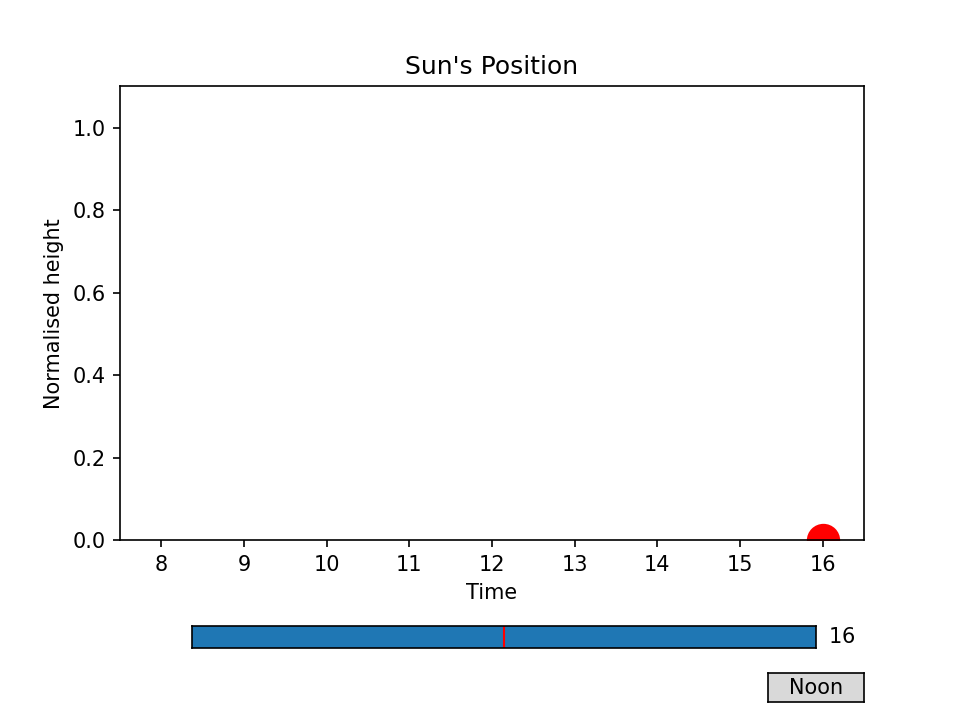

In [8]:
start_time = s["sunrise"].hour
end_time = s["sunset"].hour
mid_day = s["noon"].hour

xs = mid_day
peak = - (xs - start_time) * (xs - end_time)
ys = 1

# Create a figure and axis
fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.25)

# Create the point object and add it to the axis
sun_position, = ax.plot(xs, ys, marker= "o", markersize=15, color=(1, 0, 0, 1))
ax.set_facecolor((1, 1, 0, 1))

# Set the axis limits and labels
ax.set_xlim([start_time - .5, end_time + .5])
ax.set_ylim([0, 1.1])
ax.set_title("Sun's Position")
ax.set_xlabel('Time')
ax.set_ylabel("Normalised height")

# Make a horizontal slider to control the time
axloc = fig.add_axes([.2, 0.1, 0.65, 0.03])
time_slider = Slider(axloc, '', start_time, end_time, mid_day, valstep = .01)


def update(val):
    xs = time_slider.val
    sun_position.set_xdata(xs)
    ys = - (xs - start_time) * (xs - end_time) / peak
    sun_position.set_ydata(ys)
    ax.set_facecolor((1, 1, 0, ys))

time_slider.on_changed(update)

# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
button  = Button(resetax, 'Noon', hovercolor='0.970')


def reset(event):
    time_slider.reset()
button.on_clicked(reset)


plt.show()